In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm

%matplotlib inline

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.width', 10000)

mpl.rcParams["image.cmap"]='gist_rainbow'

## Moving to the output folder

In [2]:
cd D:\crypto\backtesting_output

D:\crypto\backtesting_output


## Open csv result file

In [3]:
df_results = pd.read_csv('trade_results.csv')

print('n_ens', len(df_results['start_date'].unique()))

n_ens 2


## Processing all the results

In [4]:
ind_buy_list = []
ind_sell_list = []
profit_mean_list = []
profit_min_list = []
profit_max_list = []
profit_std_list = []
profit_med_list = []
profit_sum_list = []
cash_mean_list = []
cash_min_list = []
cash_max_list = []
cash_std_list = []
ttime_max_mean_list = []
ttime_min_mean_list = []
ttime_mean_mean_list = []
ttime_std_mean_list = []
profit_mean_overs_std_list = []
profit_mean_over_min_list = []
profit_sum_over_std_list = []
n_trans_per_day_mean_list = []
n_trans_per_day_std_list = []
n_trans_per_day_min_list = []
n_trans_per_day_max_list = []


for y in tqdm (df_results['ind_buy'].unique(), desc="Looping..."):
    for z in df_results['ind_sell'].unique():        
        
        tmp_profit = []
        tmp_cash = []
        tmp_ntrans = []
        ttime_max = []
        ttime_min = []
        ttime_mean = []
        ttime_std = []        
        
        df = df_results.loc[
            (df_results['ind_buy'] == y)
            & (df_results['ind_sell'] == z)
            ]
        
        tmp_profit = df['profit_per_day'].tolist()
        tmp_cash = df['cash_final'].tolist()
        tmp_ntrans = df['n_trans_per_day'].tolist()
        ttime_max_list = df['ttime_max'].tolist()
        ttime_min_list = df['ttime_min'].tolist()
        ttime_mean_list = df['ttime_mean'].tolist()
        ttime_std_list = df['ttime_std'].tolist()        
                
        if np.mean(np.array(tmp_profit)) > -100 and np.min(np.array(tmp_profit))> -100:
            profit_mean_list.append(np.mean(np.array(tmp_profit)))
            profit_min_list.append(np.min(np.array(tmp_profit)))
            profit_max_list.append(np.max(np.array(tmp_profit)))
            profit_std_list.append(np.std(np.array(tmp_profit)))
            profit_med_list.append(np.median(np.array(tmp_profit)))
            profit_sum_list.append(np.sum(np.array(tmp_profit)))
            cash_mean_list.append((np.mean(np.array(tmp_cash))))
            cash_min_list.append((np.min(np.array(tmp_cash))))        
            cash_max_list.append((np.max(np.array(tmp_cash))))            
            cash_std_list.append((np.std(np.array(tmp_cash))))    
            ttime_max_mean_list.append((np.mean(np.array(ttime_max_list))))
            ttime_min_mean_list.append((np.mean(np.array(ttime_min_list))))
            ttime_mean_mean_list.append((np.mean(np.array(ttime_mean_list))))
            ttime_std_mean_list.append((np.mean(np.array(ttime_std_list))))            
            profit_mean_overs_std_list.append(np.mean(np.array(tmp_profit))/np.std(np.array(tmp_profit)))
            profit_mean_over_min_list.append(np.mean(np.array(tmp_profit))/np.min(np.array(tmp_profit)))
            profit_sum_over_std_list.append(np.sum(np.array(tmp_profit))/np.std(np.array(tmp_profit)))
            n_trans_per_day_mean_list.append(np.mean(tmp_ntrans))
            n_trans_per_day_std_list.append(np.std(tmp_ntrans))
            n_trans_per_day_min_list.append(np.min(tmp_ntrans))
            n_trans_per_day_max_list.append(np.max(tmp_ntrans))            
            ind_buy_list.append(y)
            ind_sell_list.append(z)         

Looping...:   0%|                                                                               | 0/19 [00:00<?, ?it/s]c:\users\antoi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\antoi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\antoi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\antoi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Looping...: 100%|██████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 27.65it/s]


## Plot various results as a function of indicator buy/sell thresholds

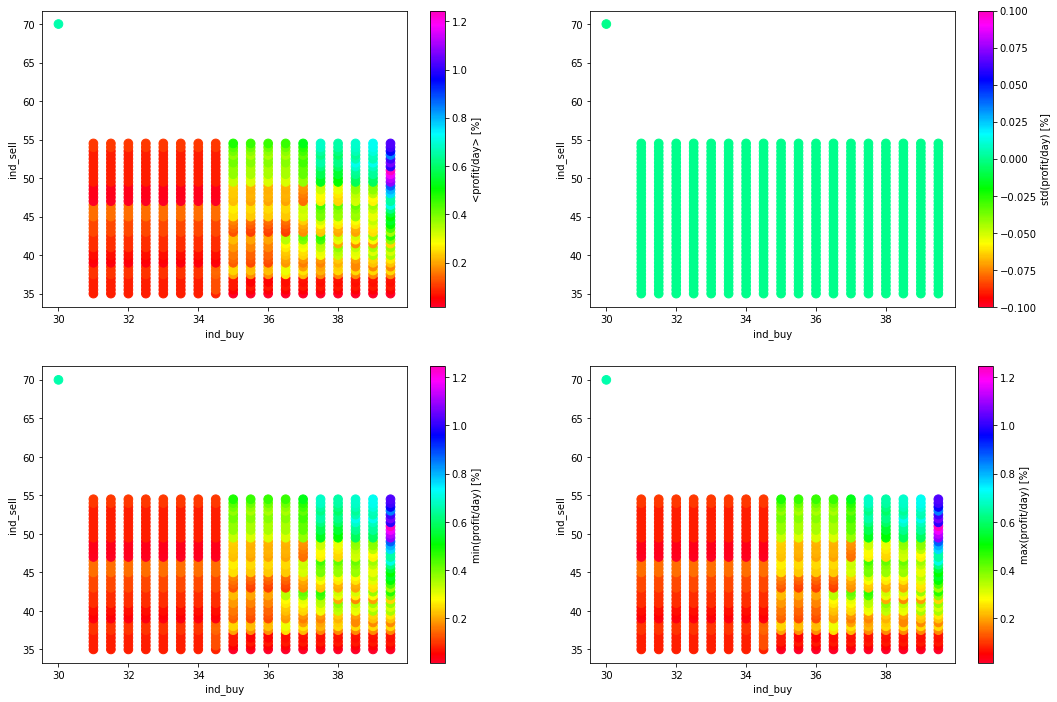

In [5]:
size=75
plt.figure(figsize=(18, 12))
plt.subplot(221)
points = plt.scatter(ind_buy_list, ind_sell_list, c=profit_mean_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='<profit/day> [%]')
plt.subplot(222)
points = plt.scatter(ind_buy_list, ind_sell_list, c=profit_std_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='std(profit/day) [%]')
plt.subplot(223)
points = plt.scatter(ind_buy_list, ind_sell_list, c=profit_min_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='min(profit/day) [%]')
plt.subplot(224)
points = plt.scatter(ind_buy_list, ind_sell_list, c=profit_max_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='max(profit/day) [%]')
plt.savefig('profit.png', dpi=300)

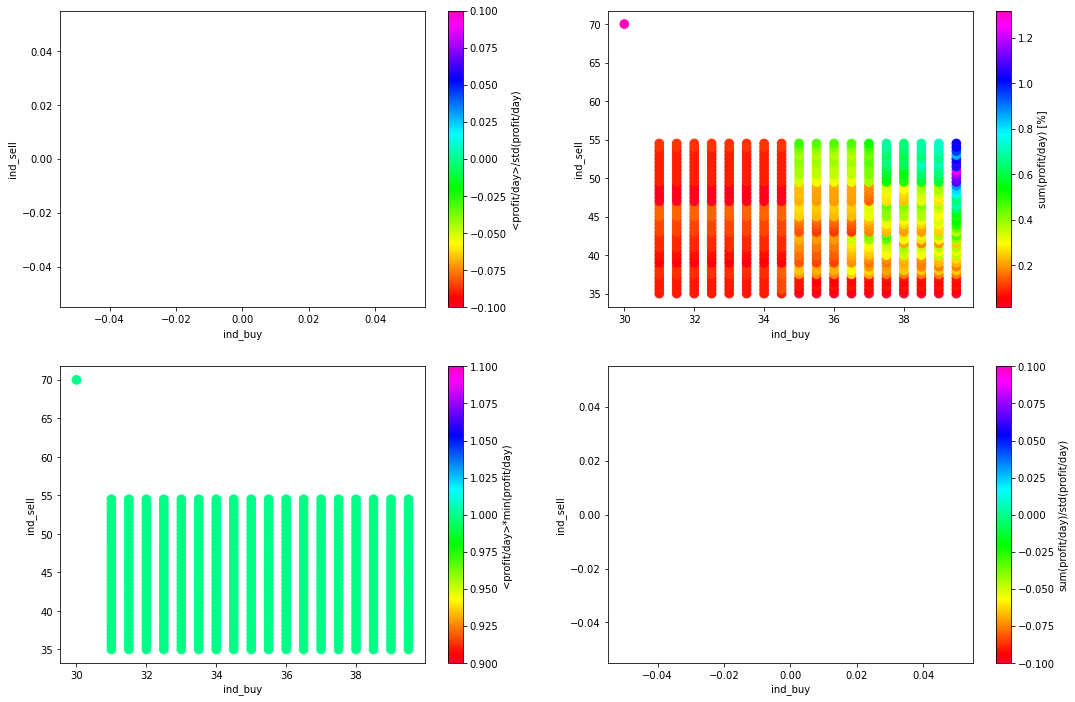

In [6]:
size=75
plt.figure(figsize=(18, 12))
plt.subplot(221)
points = plt.scatter(ind_buy_list, ind_sell_list, c=profit_mean_overs_std_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='<profit/day>/std(profit/day)')
plt.subplot(222)
points = plt.scatter(ind_buy_list, ind_sell_list, c=profit_sum_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='sum(profit/day) [%]')
plt.subplot(223)
points = plt.scatter(ind_buy_list, ind_sell_list, c=profit_mean_over_min_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='<profit/day>*min(profit/day)')
plt.subplot(224)
points = plt.scatter(ind_buy_list, ind_sell_list, c=profit_sum_over_std_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='sum(profit/day)/std(profit/day)')
plt.savefig('profit2.png', dpi=300)

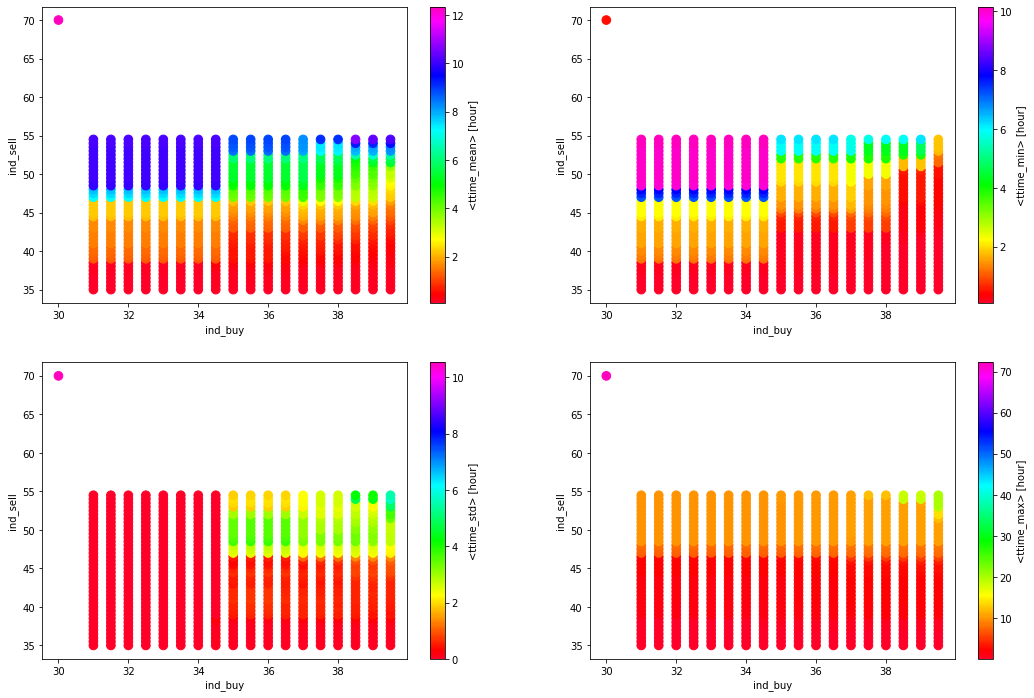

In [7]:
size=75
plt.figure(figsize=(18, 12))
plt.subplot(221)
points = plt.scatter(ind_buy_list, ind_sell_list, c=ttime_mean_mean_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='<ttime_mean> [hour]')
plt.subplot(222)
points = plt.scatter(ind_buy_list, ind_sell_list, c=ttime_min_mean_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='<ttime_min> [hour]')
plt.subplot(223)
points = plt.scatter(ind_buy_list, ind_sell_list, c=ttime_std_mean_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='<ttime_std> [hour]')
plt.subplot(224)
points = plt.scatter(ind_buy_list, ind_sell_list, c=ttime_max_mean_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='<ttime_max> [hour]')

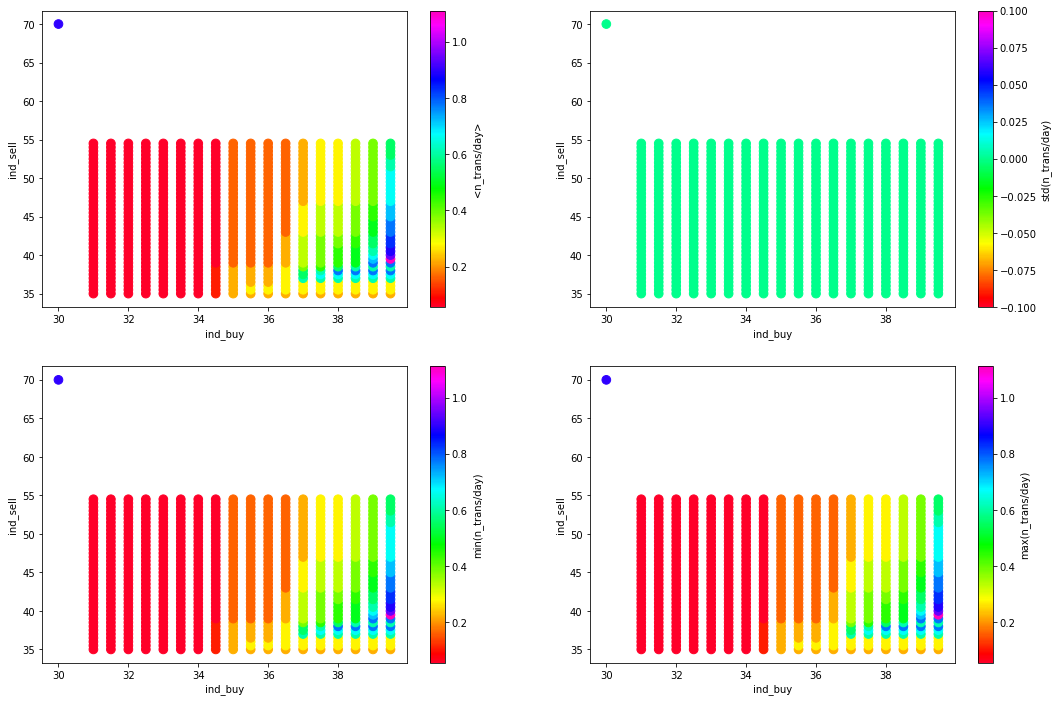

In [8]:
size=75
plt.figure(figsize=(18, 12))
plt.subplot(221)
points = plt.scatter(ind_buy_list, ind_sell_list, c=n_trans_per_day_mean_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='<n_trans/day>')
plt.subplot(222)
points = plt.scatter(ind_buy_list, ind_sell_list, c=n_trans_per_day_std_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='std(n_trans/day)')
plt.subplot(223)
points = plt.scatter(ind_buy_list, ind_sell_list, c=n_trans_per_day_min_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='min(n_trans/day)')
plt.subplot(224)
points = plt.scatter(ind_buy_list, ind_sell_list, c=n_trans_per_day_max_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='max(n_trans/day)')
plt.savefig('ntrans.png', dpi=300)

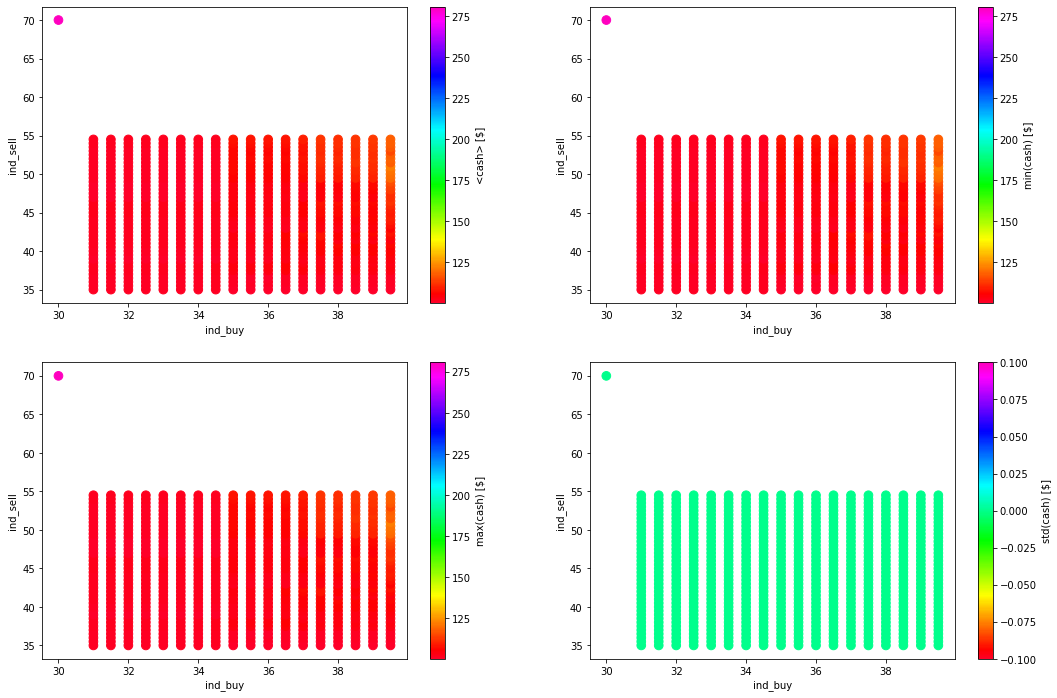

In [9]:
plt.figure(figsize=(18, 12))
plt.subplot(221)
points = plt.scatter(ind_buy_list, ind_sell_list, c=cash_mean_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='<cash> [$]')
plt.subplot(222)
points = plt.scatter(ind_buy_list, ind_sell_list, c=cash_min_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='min(cash) [$]')
plt.subplot(223)
points = plt.scatter(ind_buy_list, ind_sell_list, c=cash_max_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='max(cash) [$]')
plt.subplot(224)
points = plt.scatter(ind_buy_list, ind_sell_list, c=cash_std_list, s=size)
plt.xlabel('ind_buy')
plt.ylabel('ind_sell')
plt.colorbar(points, label='std(cash) [$]')
plt.savefig('cash_2d.png', dpi=300)

## Plot various results for a specific indicator buy/sell threshold

In [10]:
ind_buy_threshold = 34
ind_sell_threshold = 43

df_results['ind_sell'] = df_results['ind_sell'].apply(lambda x: round(x,2))
df_results['ind_buy'] = df_results['ind_buy'].apply(lambda x: round(x,2))

df = df_results.loc[(df_results['ind_buy']==ind_buy_threshold) & (df_results['ind_sell']==ind_sell_threshold)]

df['start_date'] = df['start_date'].astype('datetime64')
df['stop_date'] = df['stop_date'].astype('datetime64')

c:\users\antoi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\antoi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


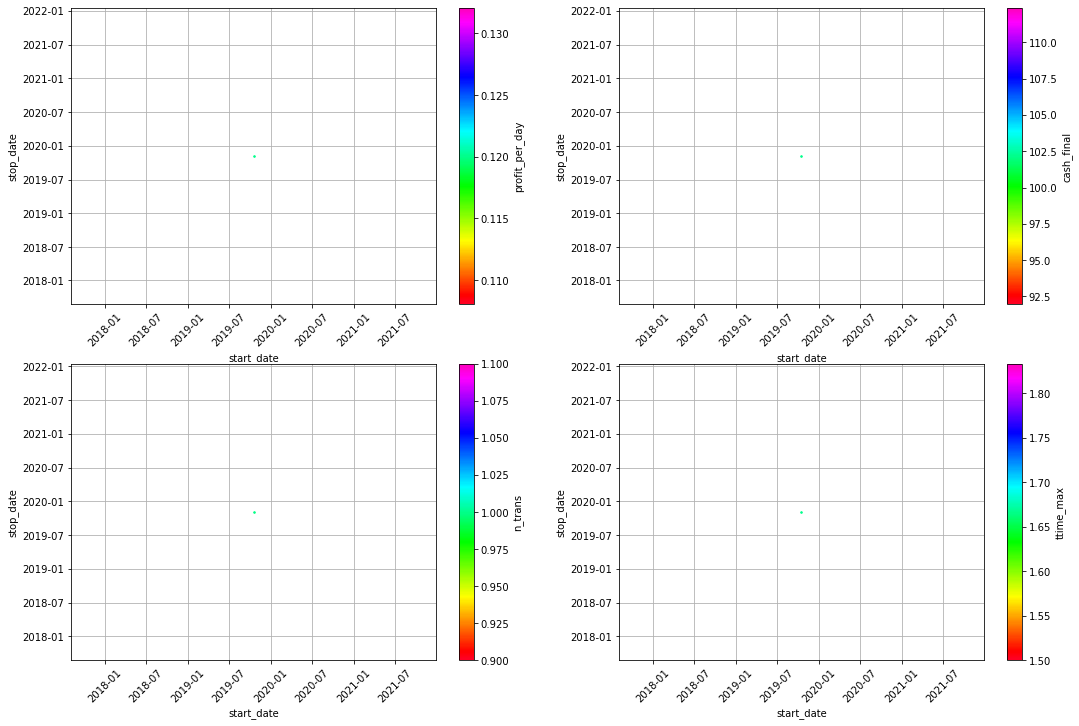

In [11]:
size=2.5
plt.figure(figsize=(18, 12))
plt.subplot(221)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['profit_per_day'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='profit_per_day')
plt.subplot(222)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['cash_final'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='cash_final')
plt.subplot(223)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['n_trans'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='n_trans')
plt.subplot(224)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['ttime_max'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='ttime_max')

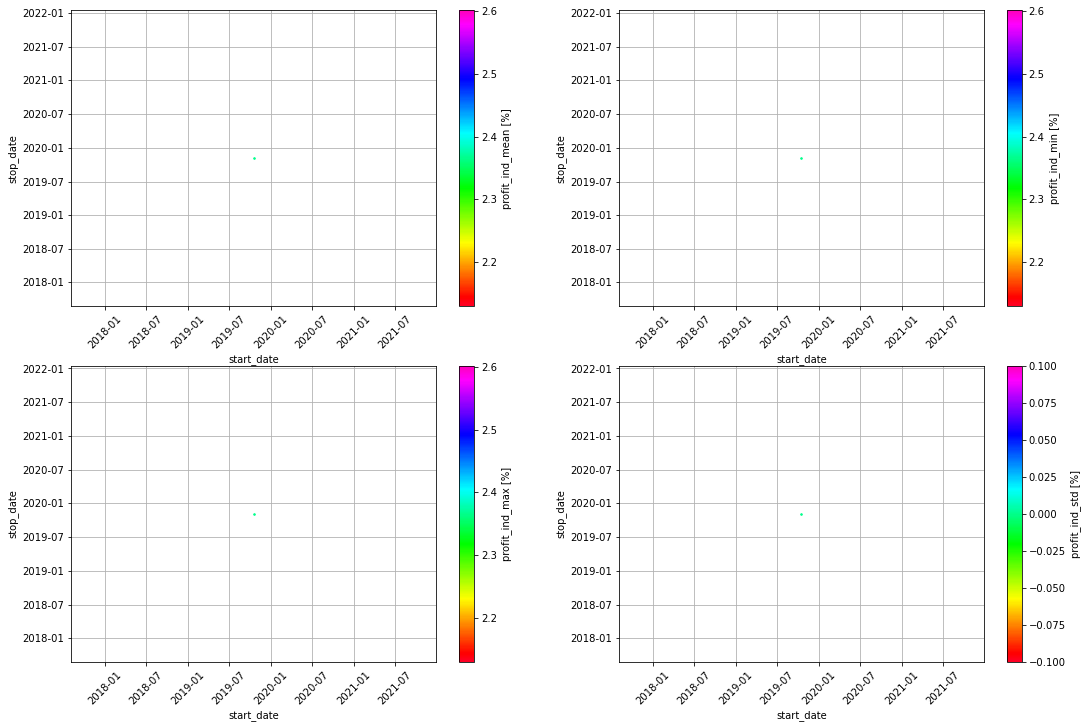

In [12]:
plt.figure(figsize=(18, 12))
plt.subplot(221)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['profit_ind_mean'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='profit_ind_mean [%]')
plt.subplot(222)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['profit_ind_min'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='profit_ind_min [%]')
plt.subplot(223)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['profit_ind_max'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='profit_ind_max [%]')
plt.subplot(224)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['profit_ind_std'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='profit_ind_std [%]')
plt.savefig('profit_ind.png', dpi=300)

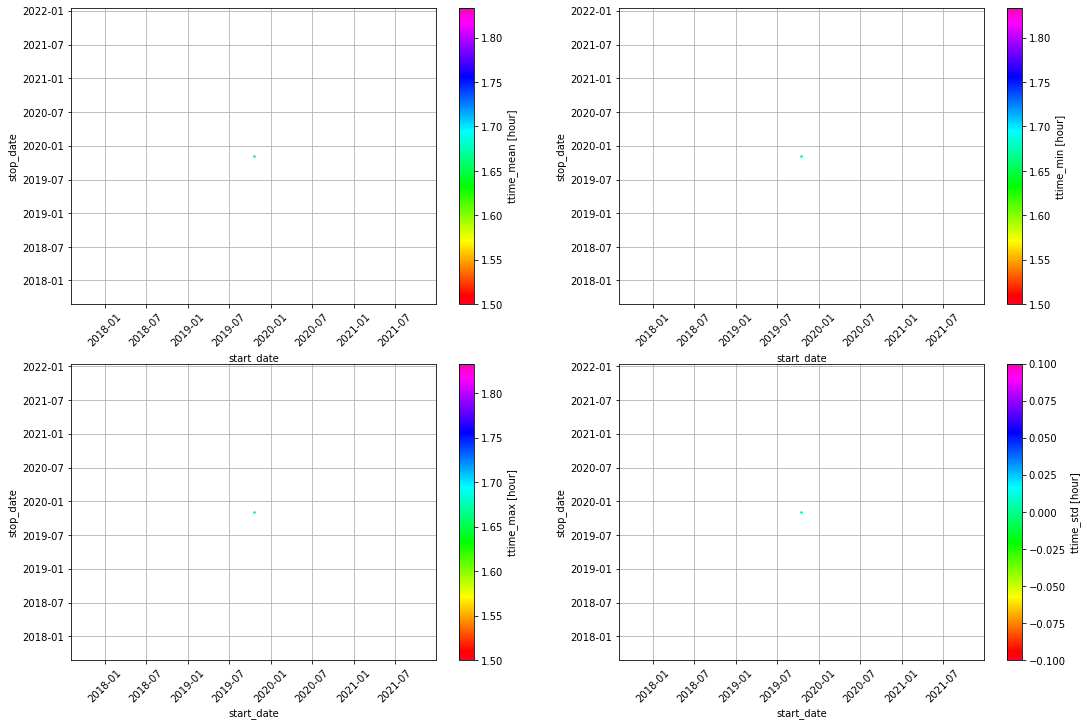

In [13]:
plt.figure(figsize=(18, 12))
plt.subplot(221)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['ttime_mean'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='ttime_mean [hour]')
plt.subplot(222)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['ttime_min'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='ttime_min [hour]')
plt.subplot(223)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['ttime_max'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='ttime_max [hour]')
plt.subplot(224)
points = plt.scatter(df['start_date'], df['stop_date'], c=df['ttime_std'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='ttime_std [hour]')
plt.savefig('time.png', dpi=300)

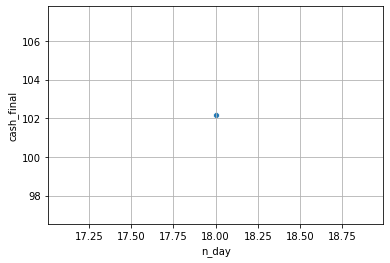

In [14]:
sns.scatterplot(data=df, x="n_day", y="cash_final")
plt.grid(True)
# plt.ylim(0, 200)
plt.savefig('cash.png', dpi=300)

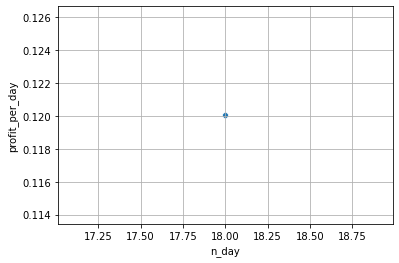

In [15]:
sns.scatterplot(data=df, x="n_day", y="profit_per_day")
plt.grid(True)

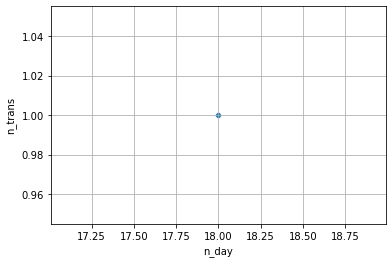

In [16]:
sns.scatterplot(data=df, x="n_day", y="n_trans")
plt.grid(True)
plt.savefig('transaction.png', dpi=300)

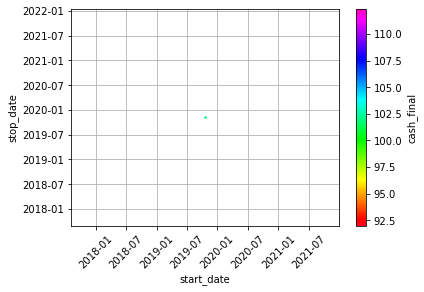

In [17]:
# plt.figure(figsize=(12,8))
points = plt.scatter(df['start_date'], df['stop_date'], c=df['cash_final'], s=size)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('start_date')
plt.ylabel('stop_date')
plt.colorbar(points, label='cash_final')
plt.savefig('cash_date.png', dpi=300)